In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('sat_score.csv')

In [3]:
data.head()

,student_id,score
0,1,1018
1,2,1218
2,3,611
3,4,723
4,5,541


In [4]:
data.tail()

,student_id,score
995,996,871
996,997,752
997,998,1087
998,999,987
999,1000,1005


In [5]:
data.describe()

,student_id,score
count,1000.000000,1000.000000
mean,500.500000,1007.460000
std,288.819436,204.426007
min,1.000000,288.000000
25%,250.750000,873.000000
50%,500.500000,1010.000000
75%,750.250000,1148.000000
max,1000.000000,1612.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  1000 non-null   int64
 1   score       1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [7]:
data.isnull().sum()

student_id    0
score         0
dtype: int64

In [8]:
# Probability of scoring less than 800
probability_less_than_800 = (data['score'] < 800).mean()
print(f"Probability that a student will score less than 800: {probability_less_than_800:.4f}")


Probability that a student will score less than 800: 0.1570


In [9]:
# Probability of scoring more than 1300
probability_more_than_1300 = (data['score'] > 1300).mean()
print(f"Probability that a student will score more than 1300: {probability_more_than_1300:.4f}")


Probability that a student will score more than 1300: 0.0680


In [10]:
# Minimum score for the 90th percentile
score_90th_percentile = np.percentile(data['score'], 90)
print(f"Minimum marks required for the 90th percentile: {score_90th_percentile:.2f}")


Minimum marks required for the 90th percentile: 1269.00


In [11]:
# Minimum score for being in the top 5%
score_top_5_percent = np.percentile(data['score'], 95)
print(f"Minimum marks required to be in the top 5%: {score_top_5_percent:.2f}")


Minimum marks required to be in the top 5%: 1338.10


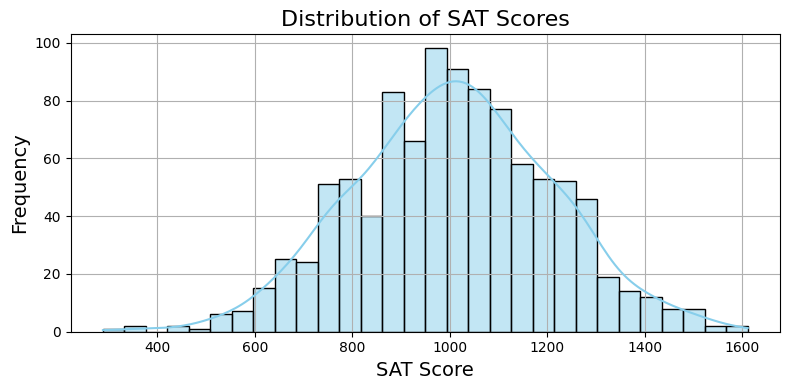

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(data['score'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of SAT Scores', fontsize=16)
plt.xlabel('SAT Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


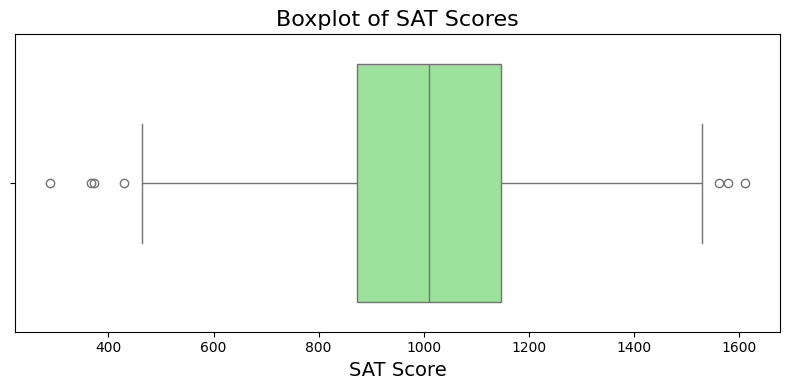

In [14]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['score'], color='lightgreen')
plt.title('Boxplot of SAT Scores', fontsize=16)
plt.xlabel('SAT Score', fontsize=14)
plt.tight_layout()
plt.show()


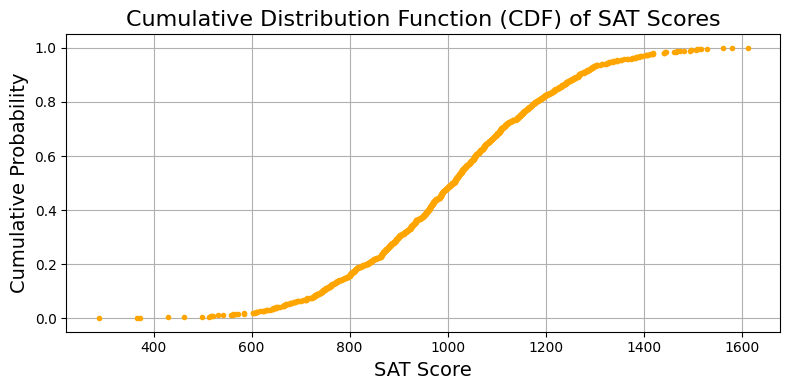

In [15]:
plt.figure(figsize=(8, 4))

# Sort the SAT scores
sorted_scores = np.sort(data['score'])

# Calculate the cumulative probability
cdf = np.arange(1, len(sorted_scores) + 1) / len(sorted_scores)

# Plot the CDF
plt.plot(sorted_scores, cdf, marker='.', linestyle='none', color='orange')
plt.title('Cumulative Distribution Function (CDF) of SAT Scores', fontsize=16)
plt.xlabel('SAT Score', fontsize=14)
plt.ylabel('Cumulative Probability', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
!pip install scipy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 162.5 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 327.7 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 358.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/44.8 MB 1.3 MB/s eta 0:00:35
   ---------------------------------------- 0.2/44.8 MB 1.3 MB/s eta 0:00:35
   ---------------------------------------- 0.2/44.8 MB 1.4 MB/s eta 0:00:33
   ---------------------------------------- 0.3/44.8 MB 1.4 MB/s eta 0:00:32
   ---------------------------------------- 0.3/44.8 MB 1.2 MB/s eta 0:00:37
   -----------------

In [20]:
from scipy.stats import binom

# Given data
n = 10  # number of trials (visitors)
p = 0.8  # probability of success (buying souvenirs)

# 1. Probability that every visitor buys souvenirs (k = 10)
probability_all_buy = binom.pmf(10, n, p)
print(f"Probability that every visitor will buy souvenirs: {probability_all_buy:.4f}")

# 2. Probability that a maximum of 7 visitors buy souvenirs (X <= 7)
probability_max_7_buy = binom.cdf(7, n, p)
print(f"Probability that a maximum of 7 visitors will buy souvenirs: {probability_max_7_buy:.4f}")


Probability that every visitor will buy souvenirs: 0.1074
Probability that a maximum of 7 visitors will buy souvenirs: 0.3222
